### 연령대에 따른 커피 취향 차이

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('./GACTT_RESULTS_ANONYMIZED.csv')
df.head(2)

,Submission ID,Respondent ID,Submitted at,What is your age?,What is your ZIP code?,How many cups of coffee do you typically drink per day?,Where do you typically drink coffee?,Where do you typically drink coffee? (At home),Where do you typically drink coffee? (At the office),Where do you typically drink coffee? (On the go),...,Gender,Gender (please specify),Marital Status,Household Income,Education Level,Ethnicity/Race,Ethnicity/Race (please specify),Employment Status,Number of Children,Political Affiliation
0,gMR29l,vDzkBA,9/11/23 20:50,18-24 years old,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,BkPN0e,9Z4VME,9/11/23 20:52,25-34 years old,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4042 entries, 0 to 4041
Columns: 118 entries, Submission ID to Political Affiliation
dtypes: float64(21), object(97)
memory usage: 3.6+ MB


In [4]:
# for column in df.columns:
#     print(column)

In [5]:
selected_columns = [
    "What is your age?",
    "What is your favorite coffee drink?",
    "How strong do you like your coffee?",
    "How much caffeine do you like in your coffee?"
]

df = df[selected_columns]

In [6]:
# 결측치
df.isnull().sum()

What is your age?                                 31
What is your favorite coffee drink?               62
How strong do you like your coffee?              126
How much caffeine do you like in your coffee?    125
dtype: int64

In [7]:
print(len(df))
df = df.dropna()
len(df)

4042


3878

In [8]:
# df.to_csv('./coffee_df.csv')

In [9]:
age_mapping = {
    '<18 years old': 0,
    '>65 years old': 1,
    '25-34 years old': 2,
    '45-54 years old': 3,
    '35-44 years old': 4,
    '18-24 years old': 5,
    '55-64 years old': 6
}
df['Age Group'] = df['What is your age?'].map(age_mapping)

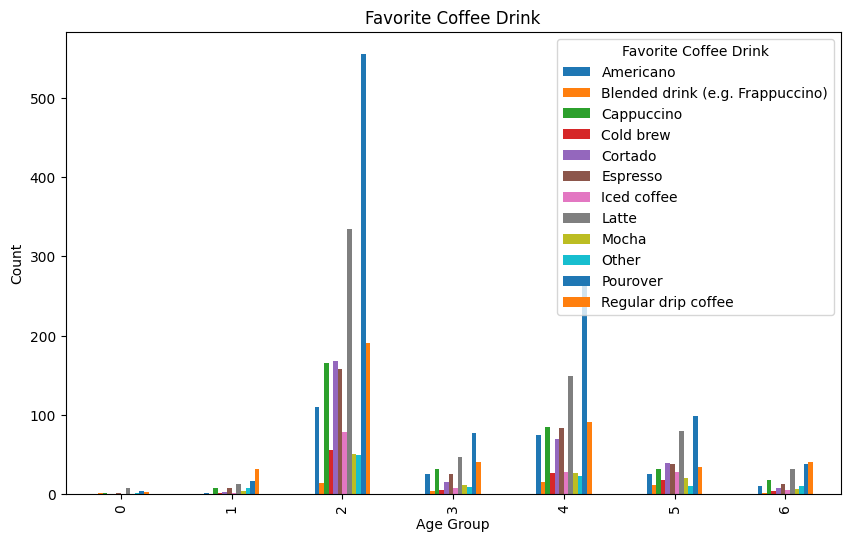

In [10]:
# 나이별 커피 선호도 빈도 계산

favorit_coffee = df.groupby('Age Group')["What is your favorite coffee drink?"].value_counts().unstack()

favorit_coffee.plot(kind='bar', figsize=(10, 6))
plt.title('Favorite Coffee Drink')
plt.xlabel('Age Group')
plt.ylabel('Count')
plt.legend(title="Favorite Coffee Drink")
plt.show()


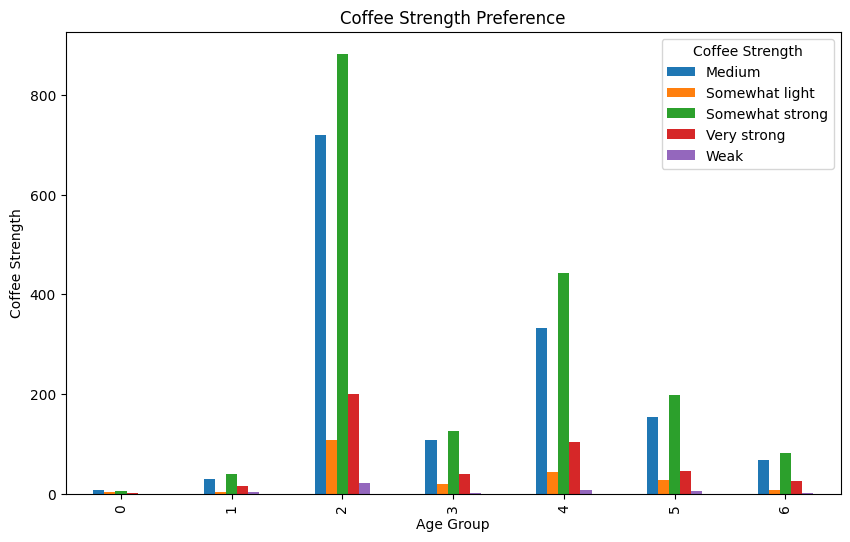

In [11]:
# 강도와 카페인 선호도 빈도 계산

strength_caffeine = pd.crosstab(df['Age Group'], df['How strong do you like your coffee?'])

strength_caffeine.plot(kind='bar', figsize=(10, 6))
plt.title('Coffee Strength Preference')
plt.xlabel('Age Group')
plt.ylabel('Coffee Strength')
plt.legend(title='Coffee Strength')
plt.show()


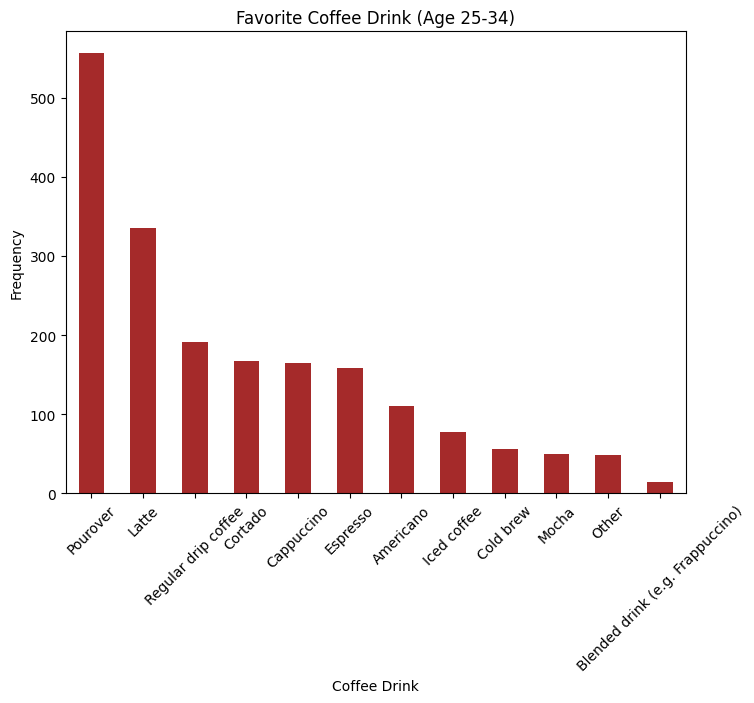

In [12]:
# 25-34의 커피 선호도
age_2534 = df[df['Age Group'] == 2]["What is your favorite coffee drink?"].value_counts()

age_2534.plot(kind='bar', figsize=(8, 6), color='brown')
plt.title('Favorite Coffee Drink (Age 25-34)')
plt.xlabel('Coffee Drink')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.show()


In [13]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

y = df['Age Group']
X = df.drop(columns=['What is your age?','Age Group'])

X = pd.get_dummies(X, drop_first=True)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

print("Accuracy:", accuracy)

Accuracy: 0.5128865979381443


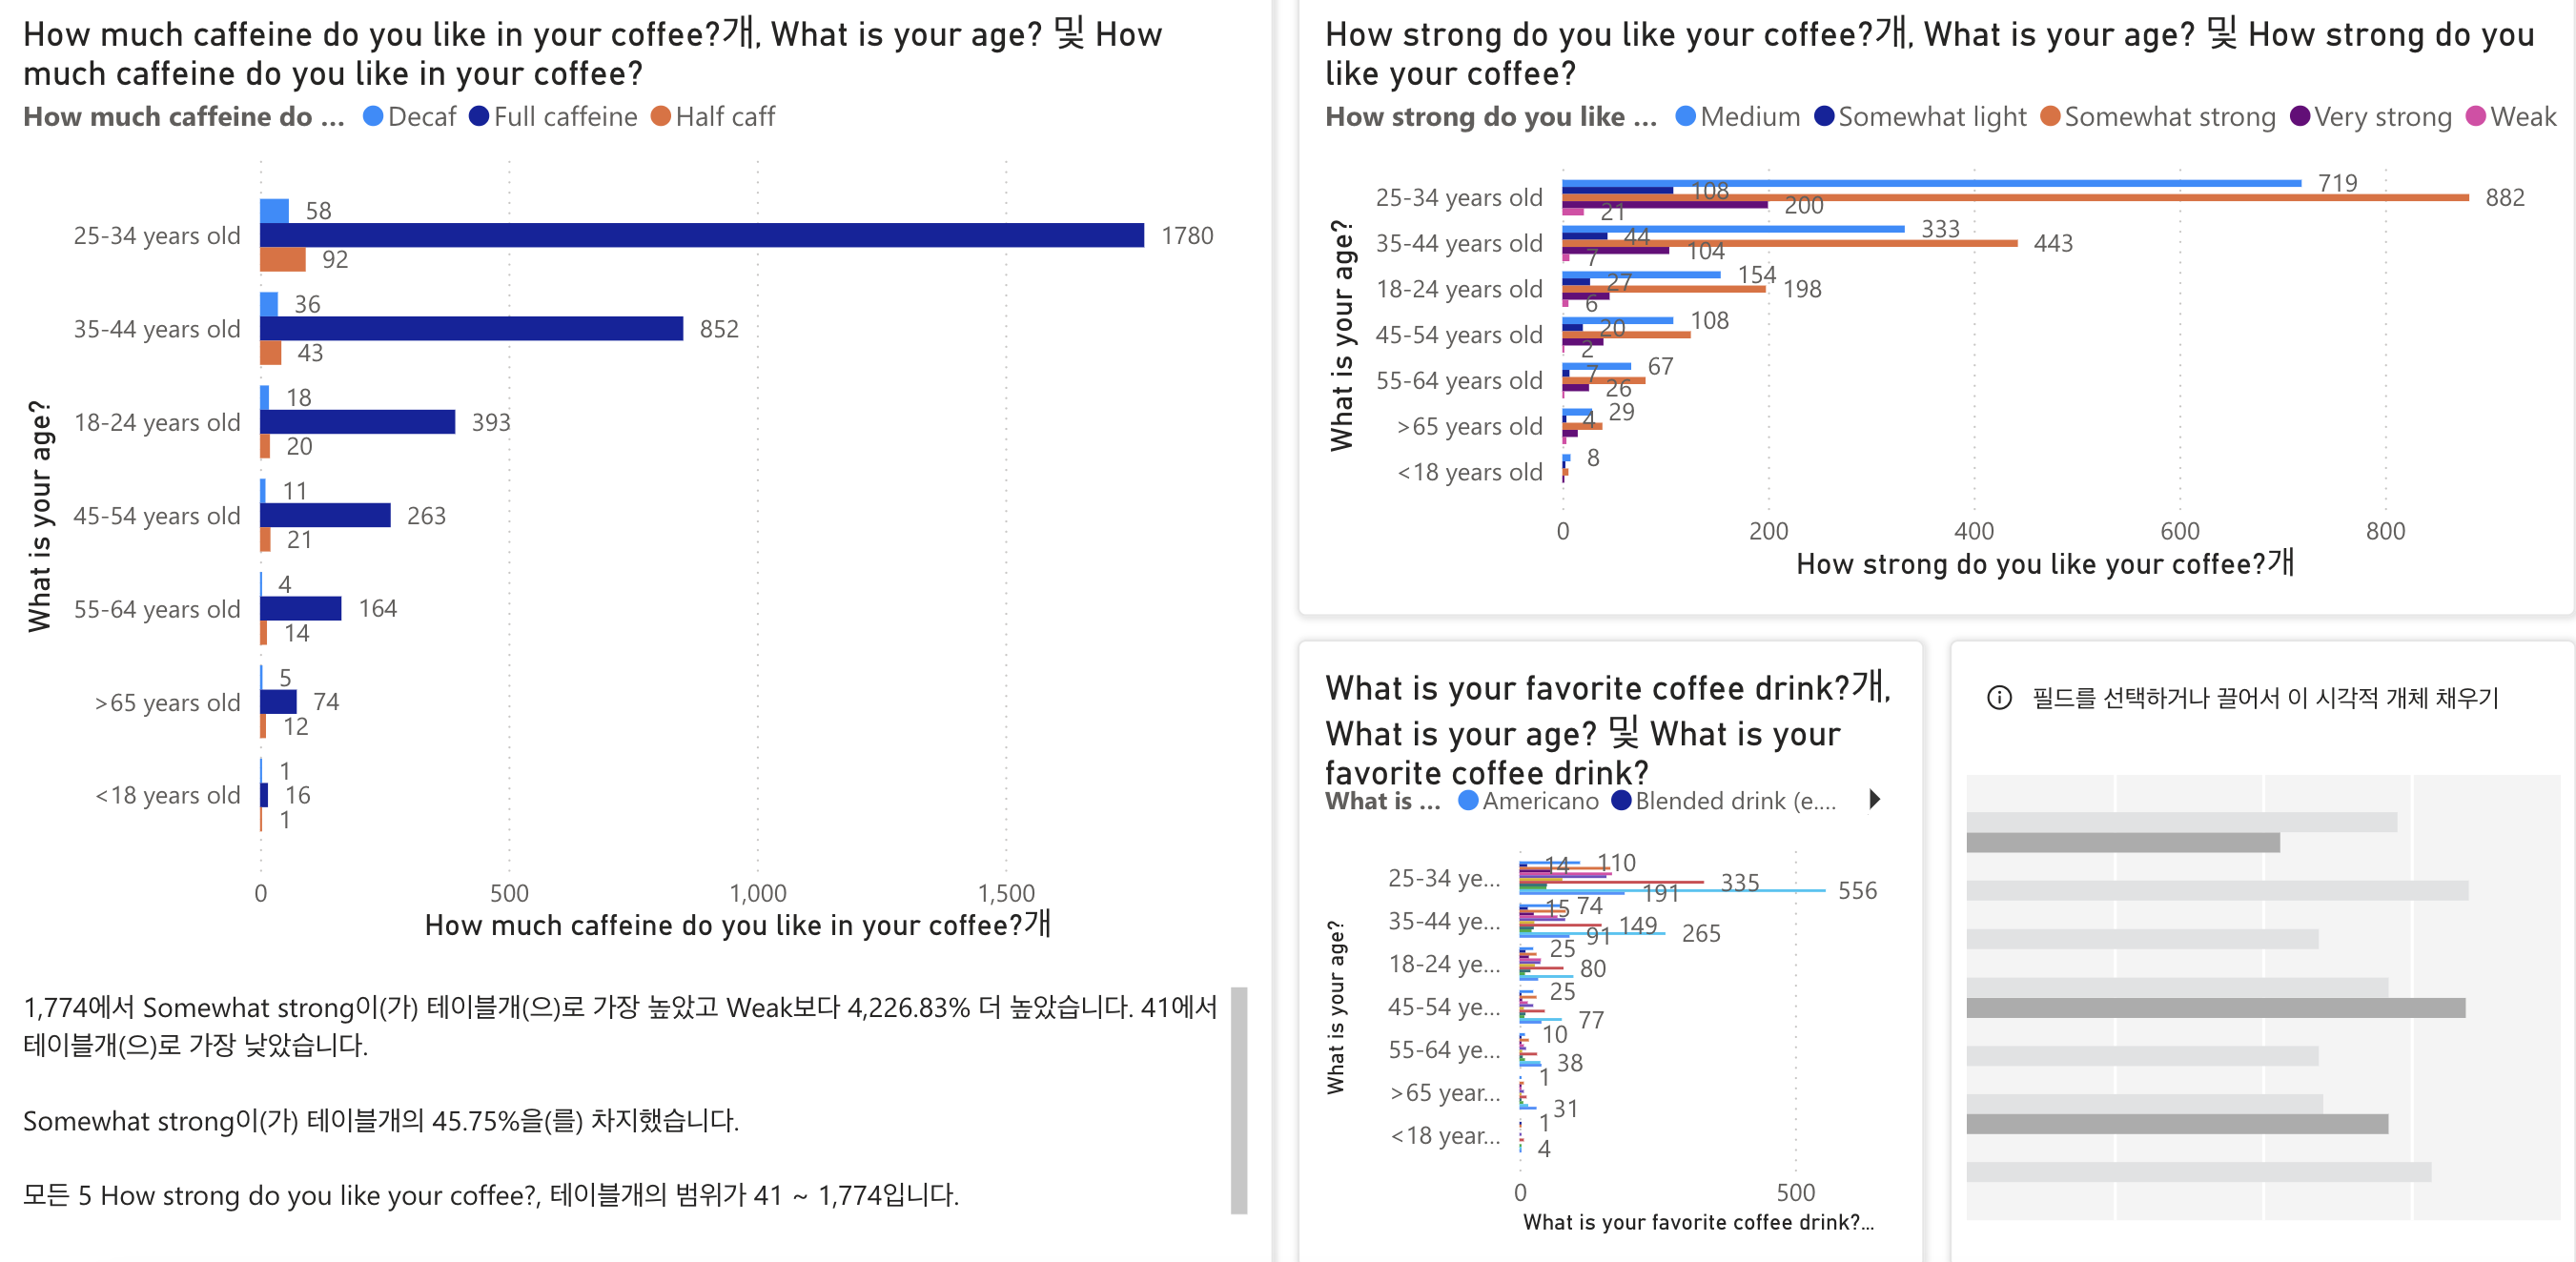

- <18세 사람들은 Full caffeine, Medium, Latte를 선호한다.
- 18 ~ 24세 사람들은 Full caffeine, Medium, Pourover를 선호한다.
- 25 ~ 34세 사람들은 Full caffeine, Somewhat strong, Pourover를 선호한다.
- 35 ~ 44세 사람들은 Full caffeine, Somewaht strong, Pourover를 선호한다.
- 45 ~ 54세 사람들은 Full caffeine, Somewaht strong, Pourover를 선호한다.
- 55 ~ 64세 사람들은 Full caffeine, Somewaht strong, Regular drip coffee를 선호한다.
- \> 65세 사람들은 Full caffeine, Somewaht strong, Regular drip coffee를 선호한다.